In [56]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import sympy as sym
import matplotlib.pyplot as plt
import math
from SolveTriangular import *

## Esame Metodi Numerici  4 Luglio 2024 - Turno I Ore 9

# Esercizio 1

Si consideri il sistema lineare:

     A  x = b 
dove A è la matrice dei coefficienti, b è il termine noto, ed x è il vettore delle incognite da determinare.
I dati di questo sistema lineare sono contenuti nel file **testI.mat**.


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

In [ ]:
from scipy.io import loadmat
dati = loadmat('testI.mat')
A = dati["A"]
b = dati["b"]
A = A.astype(float)
b = b.astype(float)

(400, 1)

- Si implementino e si testino sui dati forniti due metodi che sono adatti a risolvere tale sistema lineare con le caratteristiche delle matrici dei coefficienti date in input.
                                      **[punti 7]**

In [22]:
m, n = A.shape
print("Quadrata:", m == n)
print("Simm:", np.all(A.T == A))
# non simmetrica

D = np.diag(A)
S = np.sum(np.abs(A), axis=1) - D
print("Diagonale Dominante:", np.all(D>S))

#jacobi, gauss-seidel, gauss-seidel-sor

Quadrata: True
Simm: False
Diagonale Dominante: True


In [36]:
def jacobi(A, b, x0, toll, it_max):
    errore = 1000
    d = np.diag(A)
    n = A.shape[0]
    invM = np.diag(1 / d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    N = -(F + E)
    T = invM @ N
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale jacobi", raggiospettrale)
    it = 0

    er_vet = []
    while it <= it_max and errore >= toll:
        x = (b + N @ x0) / d.reshape(n, 1)
        errore = np.linalg.norm(x - x0) / np.linalg.norm(x)
        er_vet.append(errore)
        x0 = x.copy()
        it = it + 1
    return x, it, er_vet

def gauss_seidel(A, b, x0, toll, it_max):
    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    M = D + E
    N = -F
    T = np.dot(npl.inv(M), N)
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ", raggiospettrale)
    it = 0
    er_vet = []
    while it <= it_max and errore >= toll:
        temp = b - F @ x0
        x, _= Lsolve(M, temp)
        errore = np.linalg.norm(x - x0) / np.linalg.norm(x)
        er_vet.append(errore)
        x0 = x.copy()
        it = it + 1
    return x, it, er_vet

def gauss_seidel_sor(A, b, x0, toll, it_max, omega):
    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    Dinv = npl.inv(D)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    Momega = D + omega * E
    Nomega = (1 - omega) * D - omega * F
    T = npl.inv(Momega) @ Nomega
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)

    M = D + E
    N = -F
    it = 0
    xold = x0.copy()
    xnew = x0.copy()
    er_vet = []
    while it <= it_max and errore >= toll:
        temp = b - F @ x0
        xtilde, _ = Lsolve(M, temp)
        xnew = (1 - omega) * xold + omega * xtilde
        errore = np.linalg.norm(xnew - xold) / np.linalg.norm(xnew)
        er_vet.append(errore)
        xold = xnew.copy()
        it = it + 1
    return xnew, it, er_vet

- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **[punti 2]**

raggio spettrale jacobi 0.48209261553629823
IT Jacobi: 19
raggio spettrale Gauss-Seidel  0.28897377801649166
IT Gauss-Seidel: 12
raggio spettrale Gauss-Seidel SOR  0.28897377801649166
IT Gauss-Seidel-SOR: 2


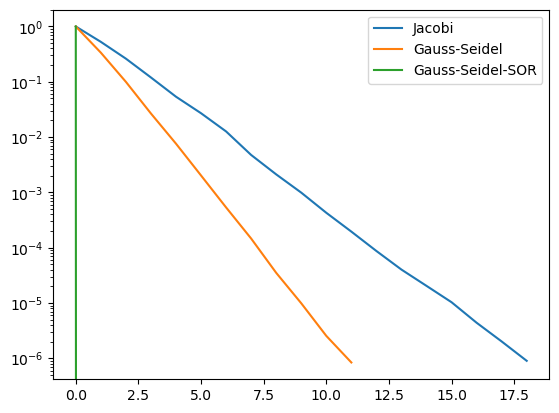

In [54]:
toll = 1e-6
itmax = 1000
omega = 1
m, n = A.shape
x0 = np.zeros(m).reshape(m, 1)

xj, itj, vxj = jacobi(A, b, x0, toll, itmax)
print("IT Jacobi:", itj)
xg, itg, vxg = gauss_seidel(A, b, x0, toll, itmax)
print("IT Gauss-Seidel:", itg)
xs, its, vxs = gauss_seidel_sor(A, b, x0, toll, itmax, omega)
print("IT Gauss-Seidel-SOR:", its)

plt.semilogy(np.arange(itj), vxj, np.arange(itg), vxg, np.arange(its), vxs)
plt.legend(["Jacobi", "Gauss-Seidel", "Gauss-Seidel-SOR"])
plt.show()

## Esercizio 2

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare
                           [**punti: 7**]

- Risolvere il sistema di equazioni non lineare 

$$
\left\{
\begin{array}{c}
x_0\cdot x_1+x_0=1 \\
 x_0^2+x_1^2=9
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria. [**punti: 3**]

 **Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X^{(0)}$ nell'intorno della soluzione che si vuole approssimare.  Per fare cio',  visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici $z_1 = f_1 (x_0 ,x_1 )$ e $z_2 = f_2(x_0 , x_1 )$ e 
definire come iterato iniziale un vettore $X^{(0)}=(x_0^{(0)},x_1^{(0)})$ oppurtuno le cui componenti appartengono ad un 
intorno della soluzione (cioè  dei punti di  intersezione tra le curve di livello delle due superfici) \]

- Descrivere teoricamente la variante del Metodo di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili.

 [**punti: 2**]
 



In [71]:
def my_newton_minimo(gradiente, Hess, x0, tolx, tolf, nmax):
    """
    DA UTILIZZARE NEL CASO IN CUI CALCOLATE DRIVATE PARZIALI PER GRADIENTE ED HESSIANO SENZA UTILIZZO DI SYMPY

    Funzione di newton-raphson per calcolare il minimo di una funzione in più variabili

    Parametri
    ----------
    fun :
            Nome della funzione che calcola il gradiente della funzione non lineare.
    Hess :
            Nome della funzione che calcola la matrice Hessiana della funzione non lineare.
    x0 : array
            Vettore contenente l'approssimazione iniziale della soluzione.
    tolx : float
            Parametro di tolleranza per l'errore assoluto.
    tolf : float
            Parametro di tolleranza per l'errore relativo.
    nmax : int
            Numero massimo di iterazioni.

    Restituisce
    -------
    x : array
            Vettore soluzione del sistema (o equazione) non lineare.
    it : int
            Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
    Xm : array
            Vettore contenente la norma del passo ad ogni iterazione.
    """

    matHess = Hess(x0)
    if npl.det(matHess) == 0:
        print(
            "La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo"
        )
        return None, None, None
    grad_fx0 = gradiente(x0)
    s = -spl.solve(matHess, grad_fx0)
    # Aggiornamento della soluzione
    it = 1
    x1 = x0 + s
    grad_fx1 = gradiente(x1)
    Xm = [np.linalg.norm(s, 1)]

    while (
        it <= itmax
        and npl.norm(s, 1) >= tolx * npl.norm(x1, 1)
        and npl.norm(grad_fx1, 1) >= tolf
    ):
        x0 = x1
        it += 1
        matHess = Hess(x0)
        grad_fx0 = grad_fx1

        if npl.det(matHess) == 0:
            print(
                "La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo"
            )
            return None, None, None

        s = -spl.solve(matHess, grad_fx0)

        # Aggiornamento della soluzione
        x1 = x0 + s

        # Calcolo del gradiente nel nuovo iterato
        grad_fx1 = gradiente(x1)
        print(np.linalg.norm(s, 1))
        Xm.append(np.linalg.norm(s, 1))

    return x1, it, Xm

In [76]:
tolx = 1e-8
tolf = 1e-8
nmax = 1000

x0 = sym.symbols("x0")
x1 = sym.symbols("x1")

f1 = x0 * x1 + x0
f1sym = sym.lambdify((x0, x1), f1, np)
df1dx0 = sym.diff(f1, x0, 1)
df1dx1 = sym.diff(f1, x1, 1)
d2f1dx0 = sym.diff(df1dx0, x0, 1)

d2f1dx0 = sym.diff(df1dx0, x0, 1)
d2f1dx1 = sym.diff(df1dx0, x1, 1)

f2 = x0**2 + x1**2

sys = np.array([f1, f2])
x = np.array([x0, x1])
jac = lambda x: sym.jacobi(x)

xx1 = np.arange(-4, 4, 0.1)
yy1 = np.arange(-4, 4, 0.1)
X1, Y1 = np.meshgrid(xx1, yy1)
Z1 = X1 * Y1 + X1

xx2 = np.arange(-4, 4, 0.1)
yy2 = np.arange(-4, 4, 0.1)
X2, Y2 = np.meshgrid(xx1, yy1)
Z2 = X2**2 + Y2**2

# fig = plt.figure()
# ax = fig.add_subplot(111, projection="3d")
# ax.plot_surface(X1, Y1, Z1)
# plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection="3d")
# ax.plot_surface(X2, Y2, Z2)
# plt.show()

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1.** Quali sono i passaggi fondamentali all’interno del paradigma generale dell’Intelligenza Artificiale?

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione e metriche

•	Data Processing, Addestramento del Modello, Predizione, Analisi economica dei risultati

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione, Test di Turing

•	Acquisizione dati, Addestramento del Modello, Test di Turing, Predizione


**2.** Per una rete neurale, l’apprendimento è legato a:

•	Minimizzare la funzione obiettivo

•	Minimizzare la funzione di attivazione

•	Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation

•	Massimizzare il valore della funzione di training


**3.**  Il Test di Turing serve a:

•	Valutare se una macchina dimostra un comportamento intelligente

•	Valutare il carico computazionale di un algoritmo di Intelligenza Artificiale

•	Valutare la velocità di risposta di un algoritmo di Intelligenza Artificiale

•	Valutare se una macchina dimostra un comportamento predicibile


**4.**
Le ultime e più recenti innovazioni nel campo dell’Intelligenza Artificiale sono:

•	CNN, GAN e Transformers

•	Expert Systems, CNN e GAN

•	Expert Systems, Deep Learning e CNN

•	CNN, Expert Systems e Transformers


**5.** A cosa serve il validation set?

•	A trovare i migliori iperparametri del modello

•	Ad addestrare il modello 

•	A testare il modello

•	A trovare le etichette dei dati di input


**Domande aperte**

Quale è il ruolo del learning rate nella formula di aggiornamento dei pesi mediante gradient descent. Aggiornamento del learning rate programmato (learning rate scheduling) : step decay, decadimento esponenziale, decadimento dipendente dal tempo. **[punti 2]**


Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 2.5]**